# Codes from Chapter 6 - Section 1 - Ascher and Greif - Second Edition

## Example from class continued

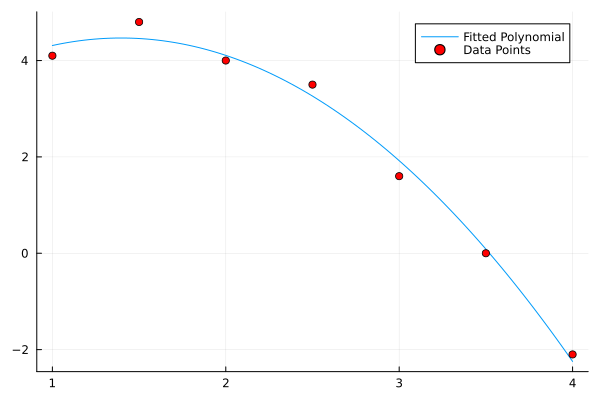

In [6]:
using Plots

# Define t as a column vector
t = collect(1:0.5:4)

# Define b as a column vector
b = [4.1, 4.8, 4, 3.5, 1.6, 0, -2.1]

# Create matrix A with point-wise powers of t
A = [t.^0 t.^1 t.^2]

# Solve the linear system
x = A \ b

# Define tt as a range of values from 1 to 4
tt = range(1, stop=4, length=100)

# Plot the fitted polynomial
plot(tt, x[1] .+ x[2] * tt .+ x[3] * tt.^2, label="Fitted Polynomial")

# Plot the original data points
scatter!(t, b, marker=:circle, color=:red, label="Data Points")


## Code for least squared fit using normal equations

In [1]:
function lsfit(t, b, n)
    # Ensure t and b are column vectors
    t = reshape(t, :, 1)
    b = reshape(b, :, 1)
    
    m = length(t)
    A = ones(m, n)
    
    # Construct the Vandermonde matrix
    for j = 1:n-1
        A[:, j+1] = A[:, j] .* t
    end
    
    # Normal equations and solution
    B = A' * A
    y = A' * b
    coefs = B \ y
    
    return coefs
end


lsfit (generic function with 1 method)

## Example 6.4. 
Sample the function $f(t) = \cos(2\pi t) + 10(t − 0.5)^5$ at 21 equidistant points on the interval $[0, 1]$ and construct best fits by polynomials of degree at most $n − 1$, for each $n = 1,2,3,4,5$.

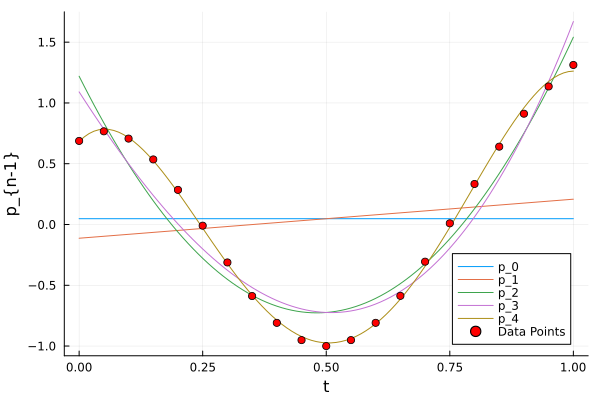

In [2]:
using Plots

# Data
m = 21
tt = range(0, stop=1, length=m)
bb = cos.(2 * π * tt) .+ 10 .* (tt .- 0.5) .^ 5

# Evaluate and plot
t = range(0, stop=1, step=0.01)
z = zeros(5, length(t))

for n in 1:5
    coefs = lsfit(tt, bb, n)  # Directly get coefficients from lsfit
    z[n, :] .= coefs[n]       # Set initial value for each row in z
    for j in (n-1):-1:1
        z[n, :] = z[n, :] .* t .+ coefs[j]
    end
end

# Plot the result
plot(t, z', label=["p_0" "p_1" "p_2" "p_3" "p_4"], xlabel="t", ylabel="p_{n-1}")
scatter!(tt, bb, marker=:circle, color=:red, label="Data Points")
